# **EDA - Análisis Exploratorio de Datos**

## Importación de librerías

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

### Carga de datos

In [2]:
df= pd.read_csv("datasets/deadly_acc.csv")
df.head(3)

,ID,NUM_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_CALLE,Calle,Cruce,...,Pos_Y,VICTIMA,ACUSADO,Dia_Sem,Barrios,Rol,Sexo,Edad,Fecha_Fallec,Rango_Etario
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,CRUCE,...,-34.687570,MOTO,AUTO,Vie,"Villa Soldati, Villa Riachuelo y Villa Lugano",CONDUCTOR,MASCULINO,19,2016-01-01,Menos de 20
1,2016-0002,1,2016-01-02,2016,1,2,1,AUTOPISTA,"PAZ, GRAL. AV.",CRUCE,...,-34.669777,AUTO,PASAJEROS,Sáb,"Liniers, Mataderos y Parque Avellaneda",CONDUCTOR,MASCULINO,70,2016-01-02,Entre 61-80
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,NO es cruce,...,-34.631894,MOTO,AUTO,Dom,"Retiro, San Nicolás, Puerto Madero, San Telmo,...",CONDUCTOR,MASCULINO,30,2016-01-03,Entre 21- 40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            715 non-null    object 
 1   NUM_VICTIMAS  715 non-null    int64  
 2   FECHA         715 non-null    object 
 3   AAAA          715 non-null    int64  
 4   MM            715 non-null    int64  
 5   DD            715 non-null    int64  
 6   HH            715 non-null    int64  
 7   TIPO_CALLE    715 non-null    object 
 8   Calle         715 non-null    object 
 9   Cruce         715 non-null    object 
 10  Direccion     715 non-null    object 
 11  COMUNA        715 non-null    object 
 12  Pos_X         704 non-null    float64
 13  Pos_Y         704 non-null    float64
 14  VICTIMA       715 non-null    object 
 15  ACUSADO       715 non-null    object 
 16  Dia_Sem       715 non-null    object 
 17  Barrios       715 non-null    object 
 18  Rol           715 non-null    

## *Outliers*

Se realiza la búsqueda de datos con valores atípicos en las features, y se analiza si es necesario eliminarlos.  

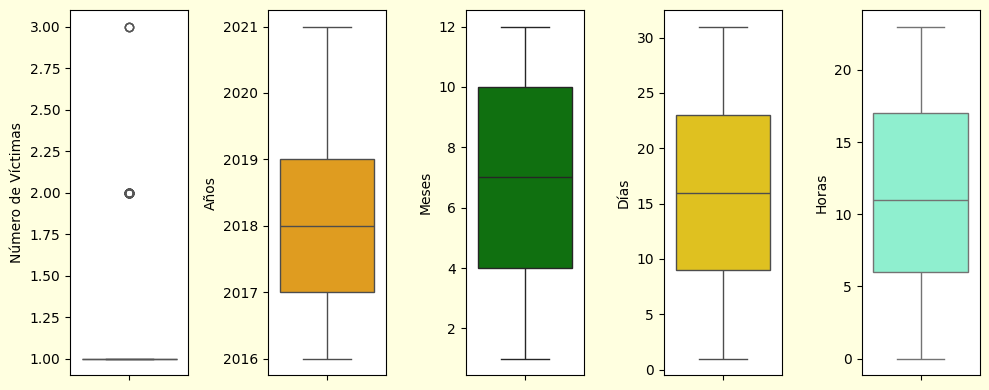

In [4]:
plt.figure(figsize=(10, 4), facecolor='lightyellow')

plt.subplot(1, 5, 1) 
sns.boxplot(data=df, y='NUM_VICTIMAS', color = "turquoise")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df, y='AAAA', color = "orange")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df, y='MM', color = "green")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df, y='DD', color = "gold")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df, y='HH', color = "aquamarine")
plt.ylabel('Horas')

plt.tight_layout()
plt.show()

<u>**Conclusión**</u>
- Los Outliers que se encuentran en la sección `Número de Víctimas` (valores 2 o 3), se debe a la gran mayoria de los casos con valor uno (1) con respecto a las víctimas mortales en los accidentes. 

## *Duplicados*

In [5]:
df.duplicated().sum()

0

<u>**Conclusión**</u>
- No existen valores duplicados sobre los registros de las muertes en los accidentes de tránsito.

_________________________________________________________________________________________________________________________________________________________

### **CORRELACIÓN ENTRE LAS VARIABLES**

### *I) Variables Numéricas*

En el dataset hay variables numéricas ó que contienen números; pero su utilización como tales va a depender del contexto de los datos.
En éste caso se utiliza un mapa de correlaciones para examinar si existen, relaciones entre los datos númericos ó se utilizarán como categóricos (en algunos casos), para el correcto análisis 

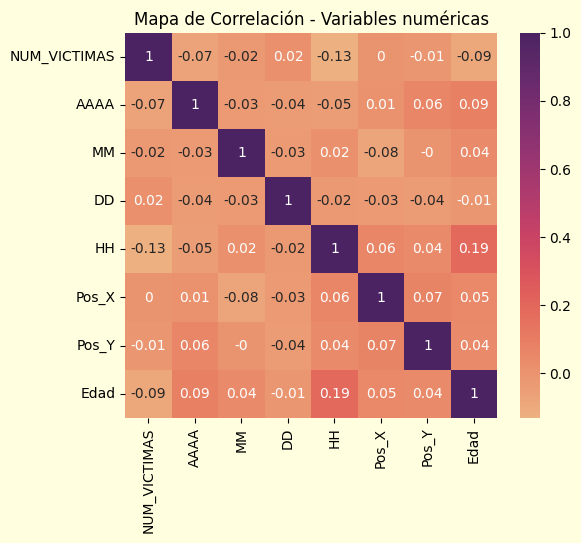

In [6]:
# Primero genero un mapa de calor con las correlaciones de todas las variables numéricas
data_num = df.select_dtypes(include=['number']) 
corr = data_num.corr().round(2)

plt.figure(figsize=(6,5), facecolor='lightyellow')
sns.heatmap(corr, cmap="flare", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

<u>***Interpretación***</u>

- Como era de esperarse hay una correlación entre las columnas de las coordenadas, pero sorprende que no exista una fuerte correlación entre las otras.
- Sólo hay una **correlacíon positiva leve** entre la variable **Edad** y **HH** (hora).
- Las demás correlaciones son negativas, sólo sirvió para confirmar la aleatoriedad de los accidentes, no se vincula a una fecha u hora puntual.

Debido al objetivo de este estudio que es disminuir la cantidad de víctimas fatales, procederé a analizar, en primer lugar, la variable **NUM_VICTIMAS**.

### **`NUM_VICTIMAS`**
#### *1- Cantidad de víctimas fatales por accidente de tránsito*

In [7]:
df.NUM_VICTIMAS.describe()

count    715.000000
mean       1.061538
std        0.257363
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: NUM_VICTIMAS, dtype: float64

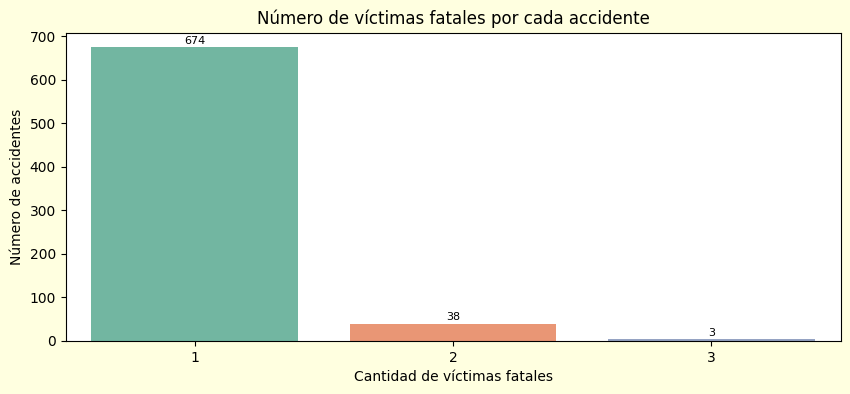

In [8]:
plt.figure(figsize=(10, 4), facecolor='lightyellow')

ax=sns.countplot(df, x='NUM_VICTIMAS', palette="Set2")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.ylabel("Número de accidentes")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Número de víctimas fatales por cada accidente")

plt.show()

<u>***Interpretación***</u>

- La cantidad de víctimas fatales que arrojan los siniestros viales es de 1 (una), en la gran mayoría de los casos. 
- Según los datos estadísticos de la columna, el 75% de los siniestros viales tienen 1 víctima.
- Rara vez resulta un siniestro con tres víctimas fatales.

#### *2- Distribución de las víctimas fatales a través del tiempo **AAAA-MM***

Se analizan los datos teniendo en cuenta diferentes horizontes temporales para corroborar la existencia de algún tipo de evento o patrón importante.

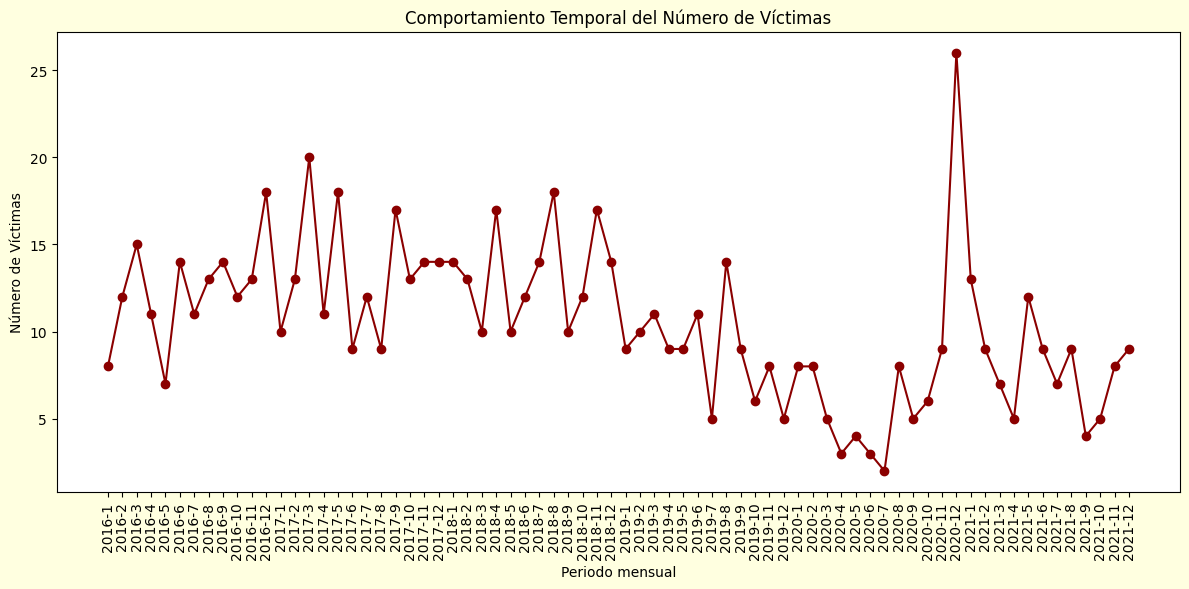

In [9]:
# Agrupar por año y mes, y sumar el número de víctimas
temp_behavior = df.groupby(['AAAA', 'MM'])['NUM_VICTIMAS'].sum().reset_index()

# Combinar AÑO y MES para obtener la columna periodo mensual "AAAA_MM" de tipo string
temp_behavior["AAAA_MM"] = temp_behavior.AAAA.astype(str) + '-' + temp_behavior.MM.astype(str)

plt.figure(figsize=(12, 6), facecolor='lightyellow')
plt.plot(temp_behavior.AAAA_MM, temp_behavior.NUM_VICTIMAS, marker='o', color='darkred')

plt.title('Comportamiento Temporal del Número de Víctimas')
plt.xlabel('Periodo mensual')
plt.ylabel('Número de Víctimas')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<u>***Interpretación***</u>

- En el gráfico de la relación temporal del número de víctimas, se muestra cómo las fechas con mayor cantidad de siniestros fatales se dan durante 2017 y 2018; luego se percibe una disminución sostenida en los siguientes años. Sólo hubo un pico, a finales de 2020 superando el mayor número de víctimas mesuales a lo largo de los años analizados (26 víctimas fatales). 
- Durante el año 2020, la llegada de la pandemia COVID19; influyó notablemente en las estadísticas de siniestros viales, lo más probable por la ausencia de autoridades de control y por la desesperación que se vivía en esos tiempos. Hecho que fue regulado rápidamente para ordenar el caos vehicular en cuanto a siniestros.

#### *3- Distribución de víctimas fatales según **Mes del año***

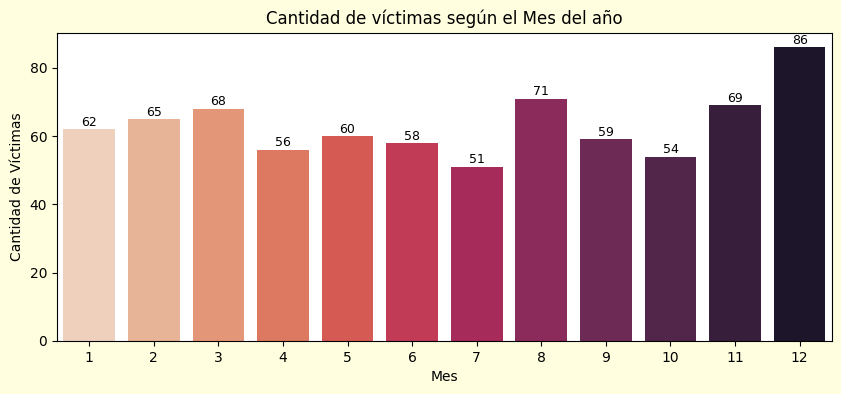

In [10]:
# Agrupo la cantidad de víctimas por mes
data_m = df.groupby(['MM'])['NUM_VICTIMAS'].sum().reset_index()

plt.figure(figsize=(10,4), facecolor='lightyellow')

ax = sns.barplot(x='MM', y='NUM_VICTIMAS', data=data_m, palette="rocket_r")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_title('Cantidad de víctimas según el Mes del año')
ax.set_xlabel('Mes') 
ax.set_ylabel('Cantidad de Víctimas')
plt.show()

### *4- Distribución de víctimas fatales según **Día del mes***

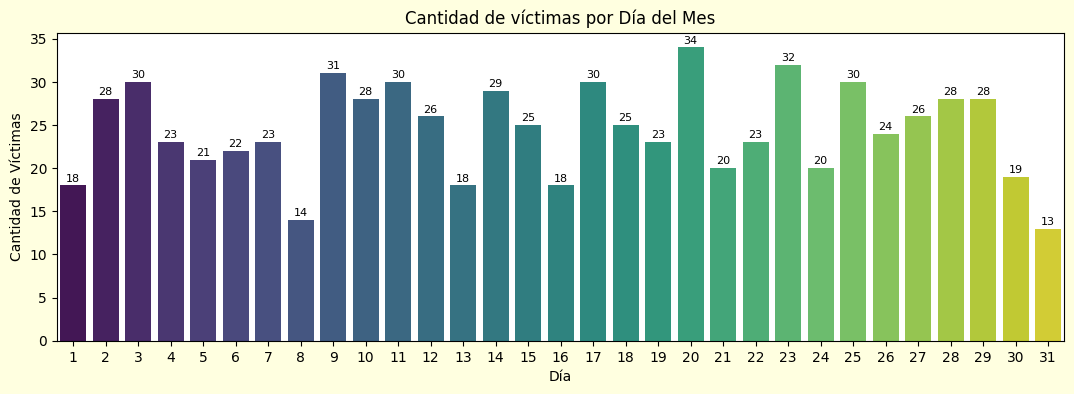

In [11]:
# Agrupa la cantidad de víctimas por dia
data_d = df.groupby(['DD'])['NUM_VICTIMAS'].sum().reset_index()

plt.figure(figsize=(13,4), facecolor='lightyellow')

ax = sns.barplot(x='DD', y='NUM_VICTIMAS', data=data_d, palette="viridis")
ax.set_title('Cantidad de víctimas por Día del Mes')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de Víctimas')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### *5- Distribución de víctimas fatales por días de la semana*

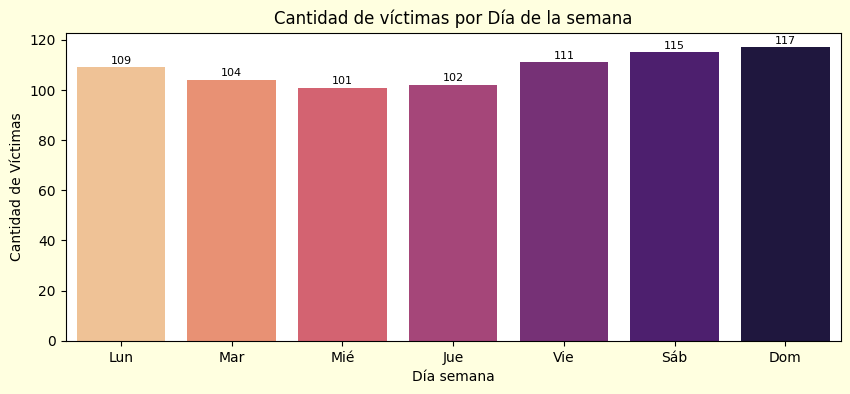

In [12]:
# Agrupa la cantidad de víctimas por dia semana
data_dow = df.groupby(['Dia_Sem'])['NUM_VICTIMAS'].sum().reset_index()

orden_dias_semana = ["Lun", "Mar", "Mié", "Jue", "Vie", "Sáb", "Dom"]
data_dow['num_dow'] = data_dow['Dia_Sem'].apply(lambda x: orden_dias_semana.index(x))
data_dow = data_dow.sort_values(by='num_dow')

plt.figure(figsize=(10,4), facecolor='lightyellow')
ax = sns.barplot(x='Dia_Sem', y='NUM_VICTIMAS', data=data_dow, palette="magma_r")
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día semana') ; ax.set_ylabel('Cantidad de Víctimas')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### *6- Distribución cruzada entre **horas** y **días de la semana** de las víctimas fatales*

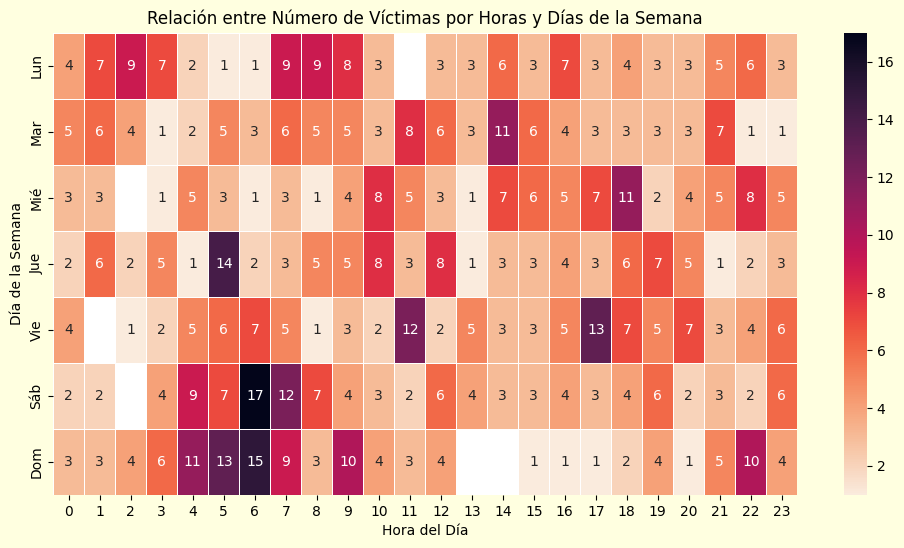

In [13]:
#Agrupo la cantidad de victimas por dia de la semana y horas 
data_dowh = df.groupby(['Dia_Sem', "HH"])['NUM_VICTIMAS'].sum().reset_index()

orden_dias_semana = ["Lun", "Mar", "Mié", "Jue", "Vie", "Sáb", "Dom"]
data_dowh['num_dow'] = data_dow['Dia_Sem'].apply(lambda x: orden_dias_semana.index(x))
data_dow = data_dow.sort_values(by='num_dow')

pivot_data = data_dowh.pivot_table(index= 'Dia_Sem', columns='HH', values='NUM_VICTIMAS', aggfunc='sum')
pivot_data = pivot_data.reindex(orden_dias_semana)

plt.figure(figsize=(12, 6), facecolor='lightyellow')
sns.heatmap(pivot_data, cmap='rocket_r', annot=True, fmt='.0f', linewidths=0.5)

plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')

plt.show()

<u>***Conclusión***</u>

- El mes con mayor cantidad de `víctimas fatales` (86) es Diciembre .
- En el `Día 20` de cada mes ocurrieron el mayor número de víctimas y también los `fines de semana` tienen la mayor cantidad de víctimas fatales.
- El mapa de calor indica que los días de fin de semana, en especial sábados y domingos se encuentran con un número más alto de víctimas fatales, siendo las horas entre 03.00 hs y 09.00 hs.

### **`EDAD`**
#### *1- Histograma de las edades de víctimas fatales*

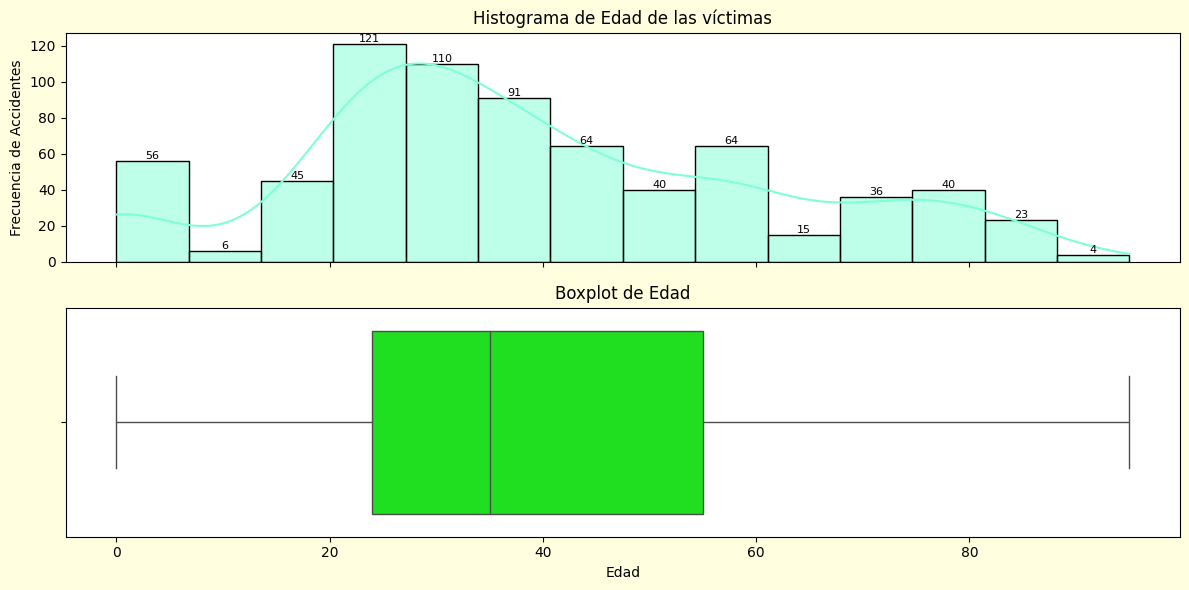

In [14]:
# Creo una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True, facecolor='lightyellow')

sns.histplot(df['Edad'], kde=True, ax=ax[0], color='aquamarine')
ax[0].set_title('Histograma de Edad de las víctimas')
ax[0].set_ylabel('Frecuencia de Accidentes')

for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

sns.boxplot(x=df['Edad'], ax=ax[1], color='lime')
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('Edad')

plt.tight_layout()
plt.show()


In [15]:
df.Edad.describe()

count    715.000000
mean      39.159441
std       21.944092
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

<u>***Interpretación***</u>

- Se puede observar que el 75% de las víctimas fatales es menor que 55 años, y que la mediana es de 35 años.
- Con respecto a la distribución del histograma, puede concluirse que la mayor cantiad de víctimas fatales se concentra entre los 20 a 40 años de edad.

### *2- Relación con la **Hora** del accidente*

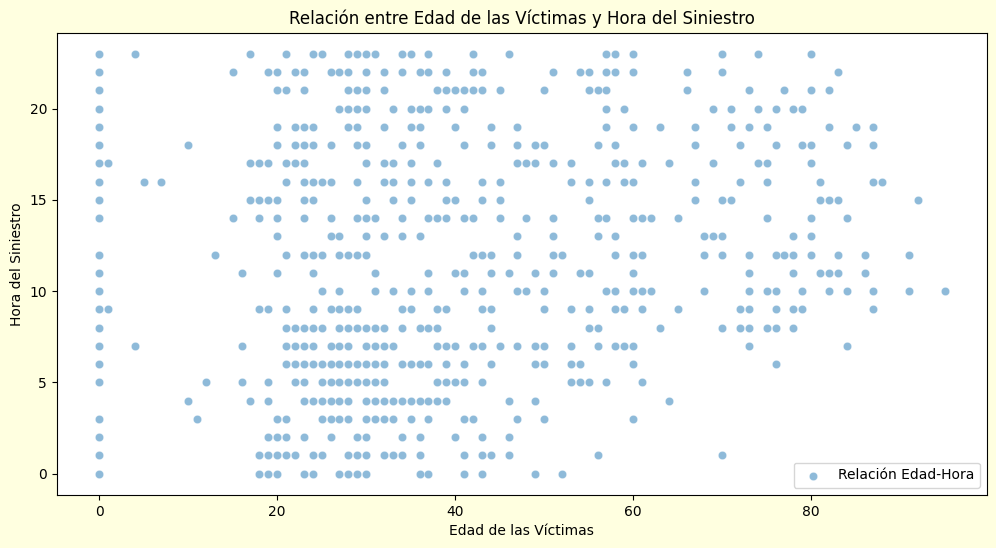

In [16]:
#Agrupo la cantidad de victimas por edad y horas 
data_ah = df.groupby(['Edad', "HH"])['NUM_VICTIMAS'].sum().reset_index()

plt.figure(figsize=(12, 6), facecolor='lightyellow')
sns.scatterplot(data=data_ah, x='Edad', y='HH', alpha=0.5, label='Relación Edad-Hora')
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas y Hora del Siniestro')

plt.legend(loc='best') 
plt.show()


### *3- Relación con la **Hora** del accidente y el **Sexo** de la víctima*

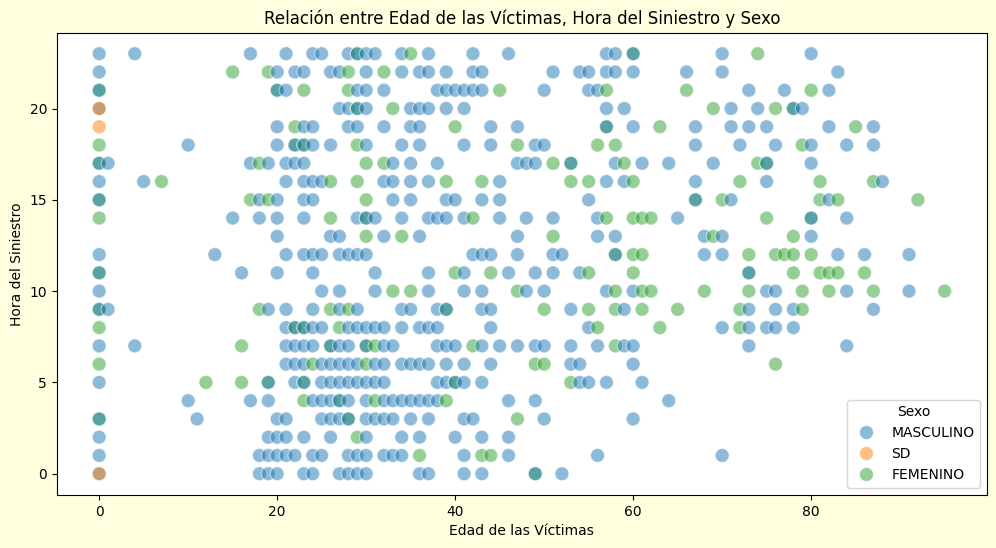

In [17]:
#Agrupo la cantidad de victimas por edad, horas y sexo
data_ahs = df.groupby(['Edad', "HH", "Sexo"])['NUM_VICTIMAS'].sum().reset_index()

plt.figure(figsize=(12, 6), facecolor='lightyellow')
sns.scatterplot(data=data_ahs, x='Edad', y='HH', hue='Sexo', alpha=0.5, palette='tab10', s=100)

plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas, Hora del Siniestro y Sexo')

plt.legend(title='Sexo')
plt.show()

<u>***Conclusión***</u>

- Las gráficas de dispersión presentadas arriba, señalan la relación entre las edades de 20 a 40 años de las víctimas y las horas de mayor cantidad de ocurrencia de los accidentes viales, siendo entre las 5 a 9 hs y 17 a 18 hs.
- Cuando se le agrega la distinción por Sexo, se muestra una mayor cantidad de víctimas `Masculinas`, con respecto a las `Femeninas`.
- Las víctimas de mayor edad son en su mayoría de Sexo `Femenino`.

### *4- Distribución etaria de víctimas según **Sexo***

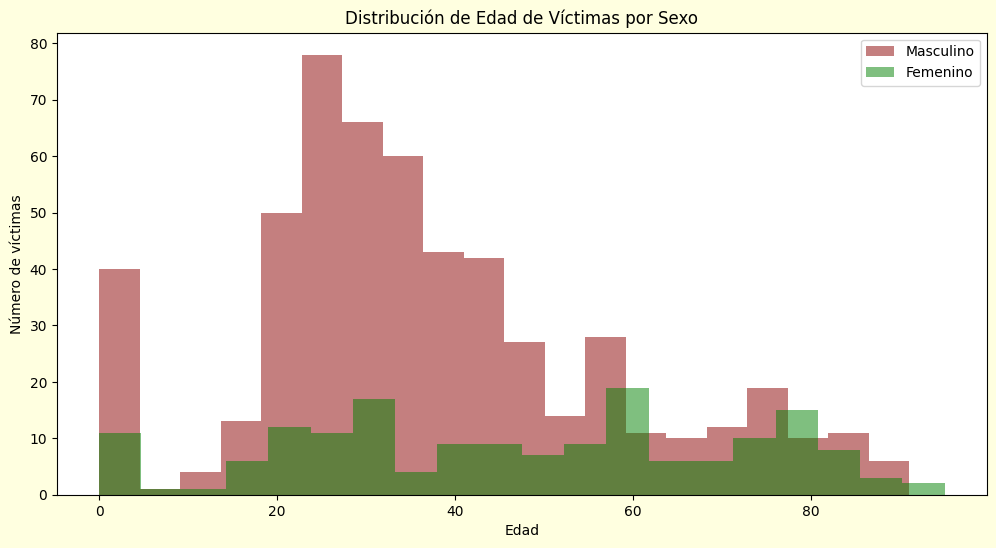

In [18]:
# Creo filtros por sexo 
male = df[df['Sexo'] == 'MASCULINO']['Edad'].dropna()
female = df[df['Sexo'] == 'FEMENINO']['Edad'].dropna()

plt.figure(figsize=(12, 6), facecolor='lightyellow')
plt.hist(male, bins=20, alpha=0.5, color='darkred', label='Masculino')
plt.hist(female, bins=20, alpha=0.5, color='green', label='Femenino')
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Número de víctimas')
plt.legend()
plt.show()

<u>***Interpretación***</u>

- El gráfico muestra que las gran mayoría de victimas de sexo Masculino son de 20 a 40 años de Edad.
- También, como ya se había adelantado en la explicación del gráfico anterior, que las víctimas de sexo Femenino son de entre 40, 60 y 80 años de Edad.

### *5- Distribución temporal de las Edades de las víctimas*

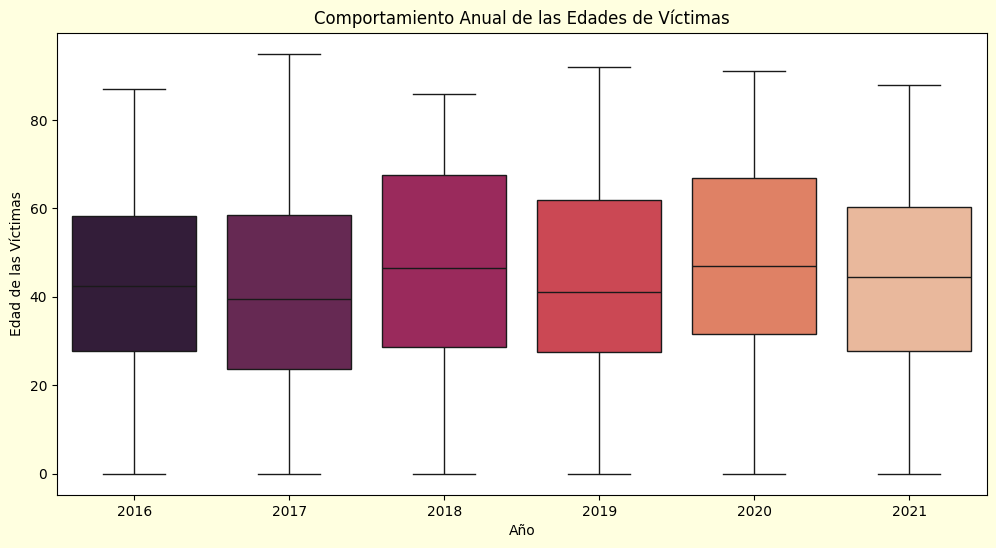

In [19]:
#Agrupo la cantidad de victimas por edad y año
data_ay = df.groupby(['Edad', "AAAA"])['NUM_VICTIMAS'].sum().reset_index()

plt.figure(figsize=(12, 6), facecolor='lightyellow')
sns.boxplot(x='AAAA', y='Edad', data=data_ay, palette="rocket")
plt.title('Comportamiento Anual de las Edades de Víctimas')
plt.xlabel('Año')
plt.ylabel('Edad de las Víctimas')
plt.xticks()
plt.show()


<u>**Conclusión**</u>
- El gráfico confirma que la mediana de la edad de las víctimas sigue bordeando los 35 años y supera esta barrera en el año 2020.

### *6- Distribución espacial con **Coordenadas** de los accidentes fatales*

In [20]:
crs={'init':'epsg:4326'}

geometry=[Point(xy) for xy in zip(df["Pos_X"], df["Pos_Y"])]
geodata=gpd.GeoDataFrame(df,crs=crs, geometry=geometry)

<u>*NOTA:*</u>

- Después de tener los pares ordenados de las coordenadas (geometría de puntos), se debe descargar la plantilla (SHP/SHX) con las divisiones políticas de CABA de la página web https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource.
- Se descarga en la carpeta **datasets**.

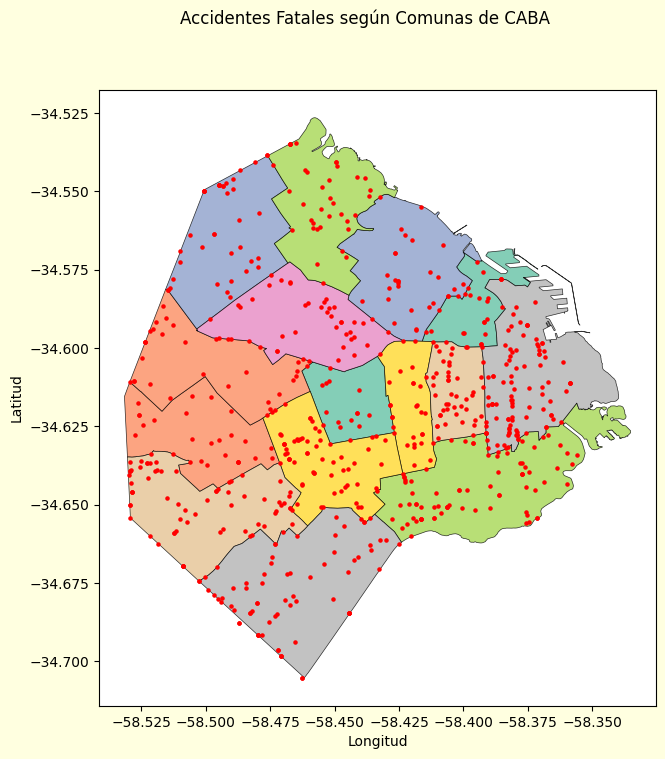

In [21]:
# Se extrae la plantilla shape_file
shape_file = gpd.read_file("datasets/comunas_wgs84.shp")

fig, ax = plt.subplots(figsize=(10,8), facecolor='lightyellow')
shape_file.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=0.8,linewidth=0.5,cmap="Set2")
geodata.plot(ax=ax, color='red', markersize=5)

fig.suptitle('Accidentes Fatales según Comunas de CABA', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')
plt.show()

<u>***Interpretación***</u>

- La mayor concentración de las víctimas fatales son de la zona Este de CABA, epecíficamente de las comunas 1, 3 y 4.
- Para poder guiarme, descargué la distribución política de las comunas:

[!['Comunas CABA'](images/comunas-caba.gif)]

_______________________________________________________________________________________________________________________________

### *II) Variables Categóricas*

### `GEOGRÁFICAS`

### *1- Distribución de las víctimas fatales según las **Comunas***

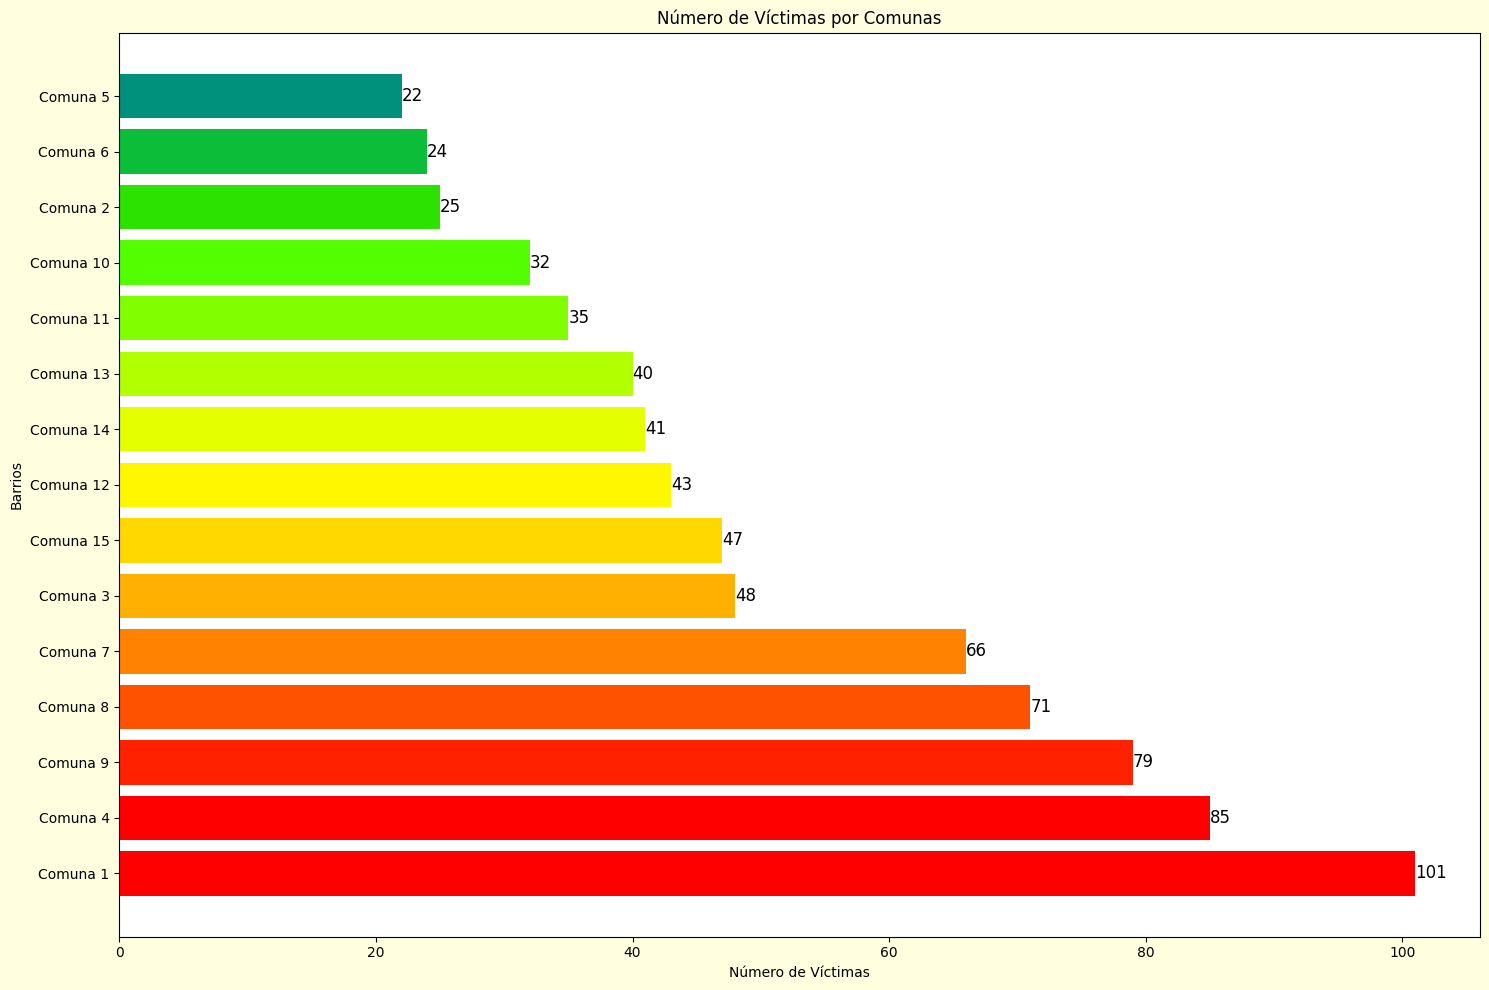

In [22]:
# Agrupo la cantidad de víctimas por comuna
data_comm=df.groupby(["COMUNA"])["NUM_VICTIMAS"].sum().reset_index()
data_comm=data_comm.sort_values(by="NUM_VICTIMAS", ascending=False)

plt.figure(figsize=(15, 10), facecolor='lightyellow')
colores = plt.cm.prism(range(len(data_comm)))
plt.barh(data_comm.COMUNA, data_comm.NUM_VICTIMAS, color=colores)
plt.xlabel('Número de Víctimas')
plt.ylabel('Barrios')
plt.title('Número de Víctimas por Comunas')
for i, v in enumerate(data_comm["NUM_VICTIMAS"]):
    plt.text(v, i, str(v), va='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()

<u>***Interpretación***</u>

- La mayor cantidad de víctimas fatales se produjeron en las comunas 1, 4, 9, 8 y 7, en ese orden.
- La Comuna 1 supera fuertemente en víctimas a la que le sigue, que es la Comuna 4, casi en 20%.

### *2-Distribución de los accidentes fatales según los **Tipos de Calles***

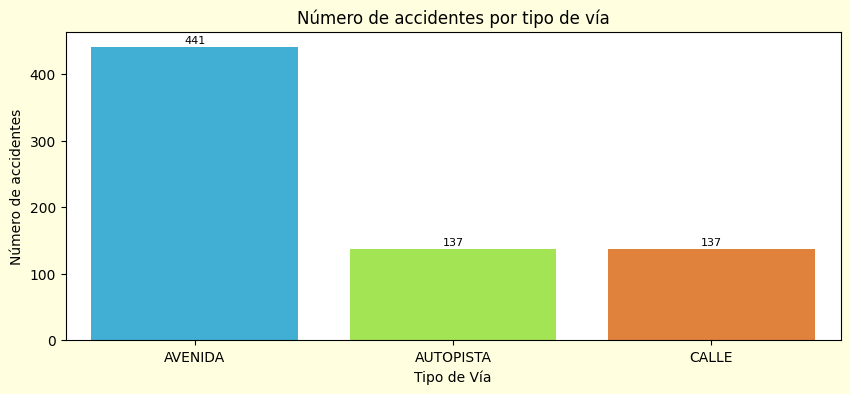

In [33]:
plt.figure(figsize=(10, 4), facecolor='lightyellow')

ax=sns.countplot(df, x='TIPO_CALLE', palette="turbo")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Tipo de Vía')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes por tipo de vía')

plt.show()

<u>***Interpretación***</u>

- El mayor número de víctimas fatales se producen en `Avenida`, secundado por `Calle`.

### *3- Distribución de los accidentes fatales en **Cruce** de calles*

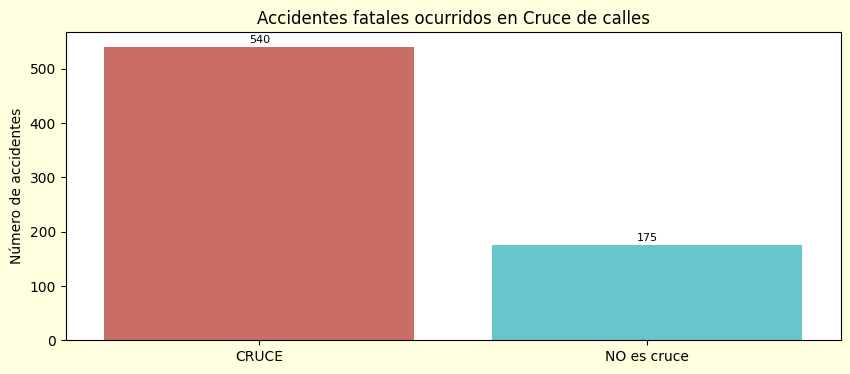

In [24]:
plt.figure(figsize=(10, 4), facecolor='lightyellow')
ax=sns.countplot(df, x='Cruce', palette="hls")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('')
plt.ylabel('Número de accidentes')
plt.title('Accidentes fatales ocurridos en Cruce de calles')
plt.show()

<u>***Interpretación***</u>

- El mayor número de accidentes fatales se producen en `Cruce`, es 3 veces más de los que NO ocurren en cruces. Se puede recomendar verificar e implementar semáforos y mayor presencia de las autoridades en los cruces.

### *4- Distribución de los accidentes fatales según las **Calles***

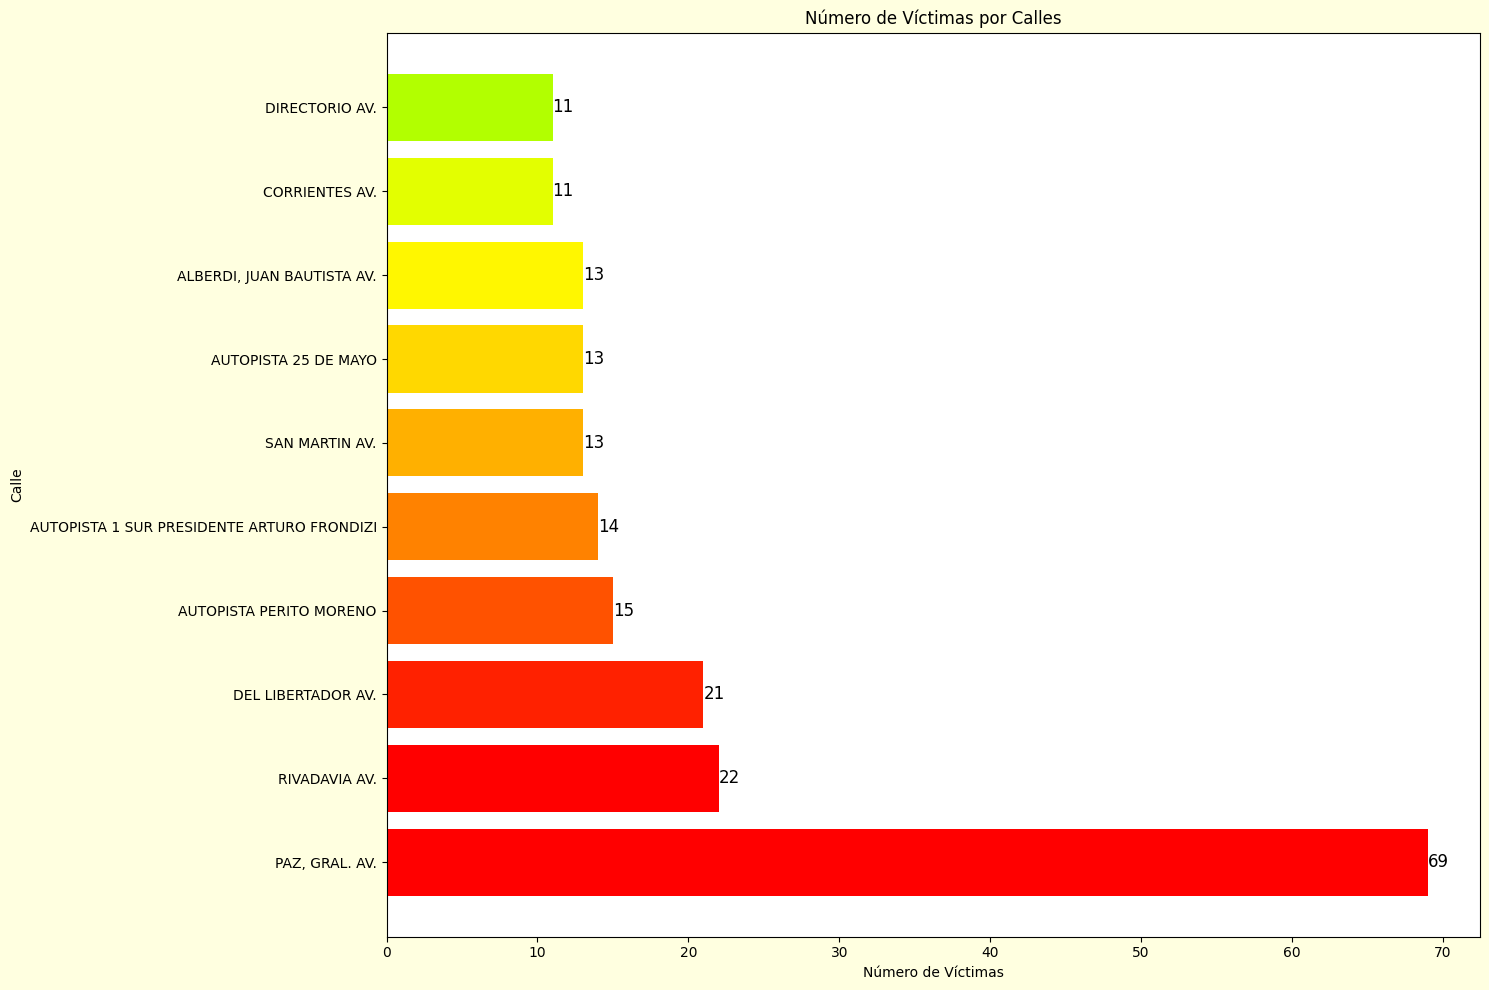

In [34]:
# Agrupo la cantidad de victimas por Calle
data_street = df.groupby(["Calle"])['NUM_VICTIMAS'].sum().reset_index()
data_street = data_street.sort_values(by="NUM_VICTIMAS", ascending=False)
data_street = data_street.head(10)

plt.figure(figsize=(15, 10), facecolor='lightyellow')
colores = plt.cm.prism(range(len(data_street)))
plt.barh(data_street.Calle, data_street.NUM_VICTIMAS, color=colores)
for i, v in enumerate(data_street["NUM_VICTIMAS"]):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=12, color='black')
plt.xlabel('Número de Víctimas')
plt.ylabel('Calle')
plt.title('Número de Víctimas por Calles')
plt.tight_layout()
plt.show()

<u>***Interpretación***</u>

- El mayor número de víctimas fatales se producen en las avenidas `Gral. Paz`, `Rivadavia` y `Del Libertador`.
- También aquí se puede recomendar verificar e implementar semáforos y mayor presencia de las autoridades en estas avenidas, en especial en la primera mencionada.

### `FUNCIONALES`

### *5-Distribución de los **ACUSADOS** en los accidentes*

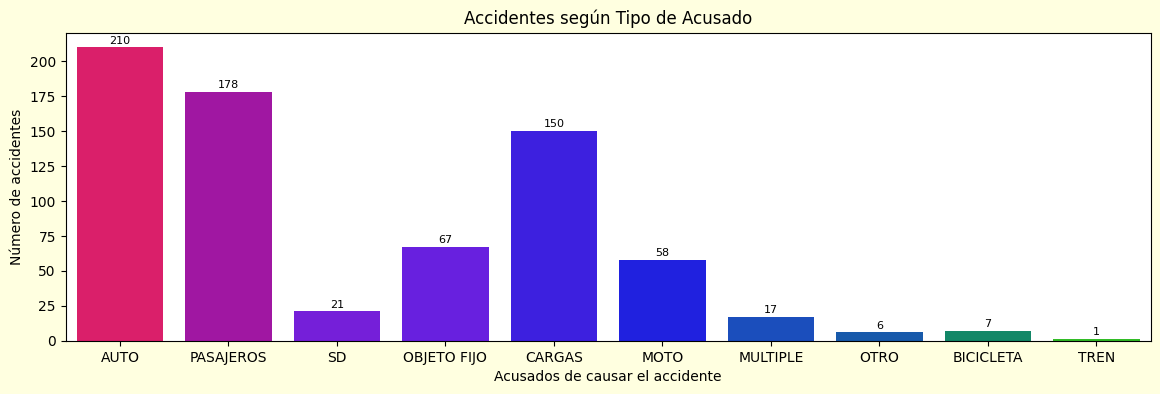

In [26]:
plt.figure(figsize=(14, 4), facecolor='lightyellow')

ax=sns.countplot(df, x="ACUSADO", palette="prism")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Acusados de causar el accidente')
plt.ylabel('Número de accidentes')
plt.title('Accidentes según Tipo de Acusado')
plt.show()

<u>***Interpretación***</u>

- Los responsables que generan más víctimas son los  `Autos`, `Pasajeros` y `Cargas`.

### *6-Distribución de **Víctimas** en los accidentes*

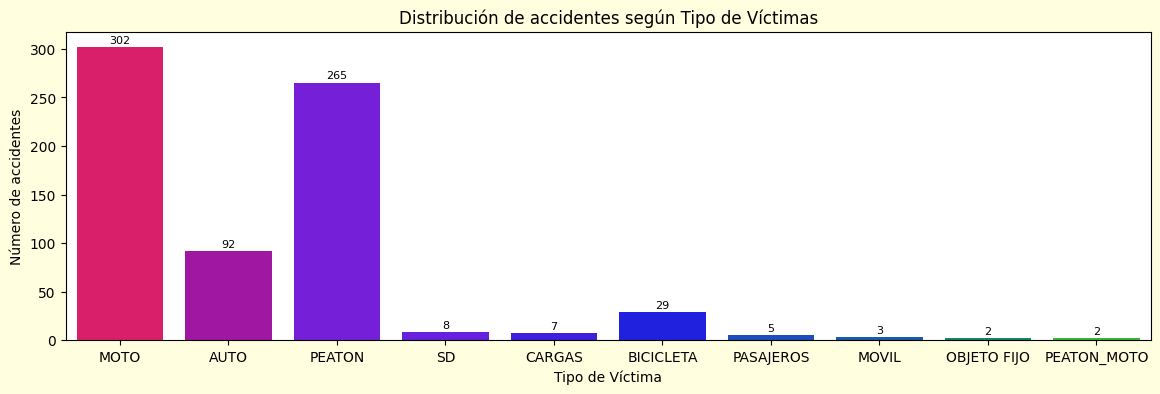

In [27]:
plt.figure(figsize=(14, 4), facecolor='lightyellow')

ax=sns.countplot(df, x="VICTIMA", palette="prism")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Número de accidentes')
plt.title('Distribución de accidentes según Tipo de Víctimas')

plt.show()

<u>***Interpretación***</u>

- Las principales tipo de víctimas son `Moto`, `Peaton` y `Auto`.

### *7- Matriz de confusión **VICTIMA - ACUSADO***

Tabla cruzada para analizar mejor, visualmente, la relación existente entre estas variables.

In [28]:
cross_tab = pd.crosstab(df['VICTIMA'], df['ACUSADO'])
cross_tab

ACUSADO,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,SD,TREN
VICTIMA,,,,,,,,,,
AUTO,33,0,15,0,3,26,1,10,4,0
BICICLETA,8,0,10,0,1,0,1,8,0,1
CARGAS,1,0,4,0,0,1,0,1,0,0
MOTO,84,2,80,25,8,40,4,50,9,0
MOVIL,0,0,2,0,0,0,0,1,0,0
OBJETO FIJO,2,0,0,0,0,0,0,0,0,0
PASAJEROS,1,0,0,0,0,0,0,3,1,0
PEATON,79,5,38,30,5,0,0,105,3,0
PEATON_MOTO,0,0,0,2,0,0,0,0,0,0


<u>***Interpretación***</u>

En esta tabla cruzada se puede observar claramente la relación existente entre los participantes en los accidentes:
- Cuando el **Acusado** es `Auto`, la mayoría de las **víctimas** son `Motos`, `Peatones` y `Autos`, en ese orden.
- Cuando el **Acusado** es `Cargas`, las **victimas** son variadas; siendo `Motos` y `Peatones` los más encontrados.
- Cuando el **Acusado** es `Pasajeros`, las **víctimas** son principalmente `Peatones` y `Motos`.

La frecuencia de **víctimas** en `Motos` y `Peatones` es alta, y se relacionan con casi todos los tipos de **Acusados**.

Adicionalmente, se puede promover el consumo de `Tren` por su bajísima tasa de siniestralidad.


### `SEXUALES`

### *8- Proporción de víctimas por **Sexo***

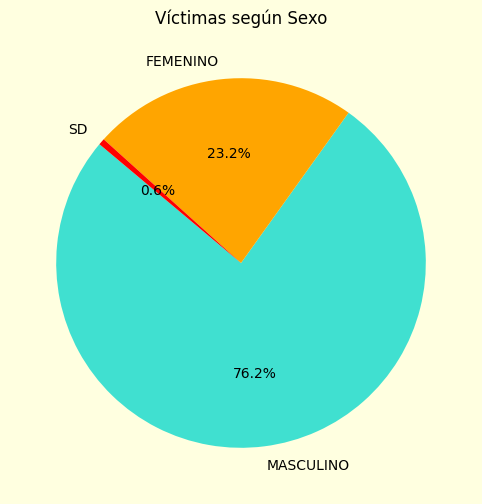

In [29]:
# Primero, calculo la proporción de víctimas por sexo
proportion = df['Sexo'].value_counts(normalize=True) * 100

labels = proportion.index
sizes = proportion.values
plt.figure(figsize=(12, 6), facecolor='lightyellow')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['turquoise', 'orange','red'])
plt.title('Víctimas según Sexo')
plt.show()

<u>***Interpretación***</u>

- Definitivamente, el número de víctimas del **Sexo** `Masculino` son muchísimo mayores que el de `Femenino`, más de 3 veces.

### *9- Distribución de los **Roles** de las víctimas por **Sexo***

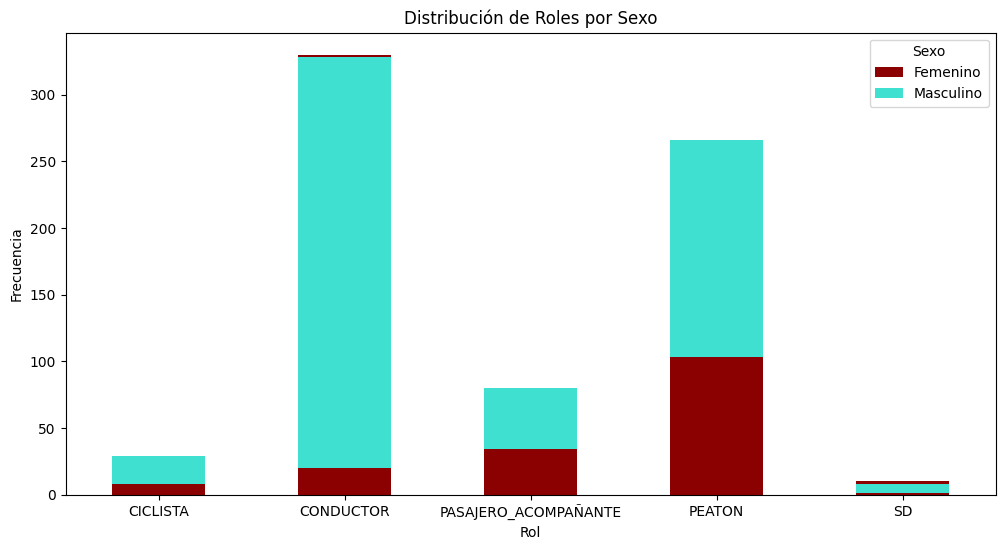

In [30]:
cross_tab = pd.crosstab(df.Rol, df.Sexo)

ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), color=["darkred",'turquoise'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

<u>***Interpretación***</u>

La distribución por roles de las víctimas muestra lo siguiente:
- En la mayor cantidad de accidentes, las víctimas fungían el rol `Conductor`, seguida por `Peatón`.
- para las víctimas de sexo `Masculino`, el rol más frecuente en los siniestros es como conductor, seguido por peatón.
- para las víctimas de sexo `Femenino`, el rol más frecuente en los siniestros es como peatón, seguido por pasajero-acompañante.

### *10- Distribucíon de víctimas según **Sexo** y **Tipo de vehículo***

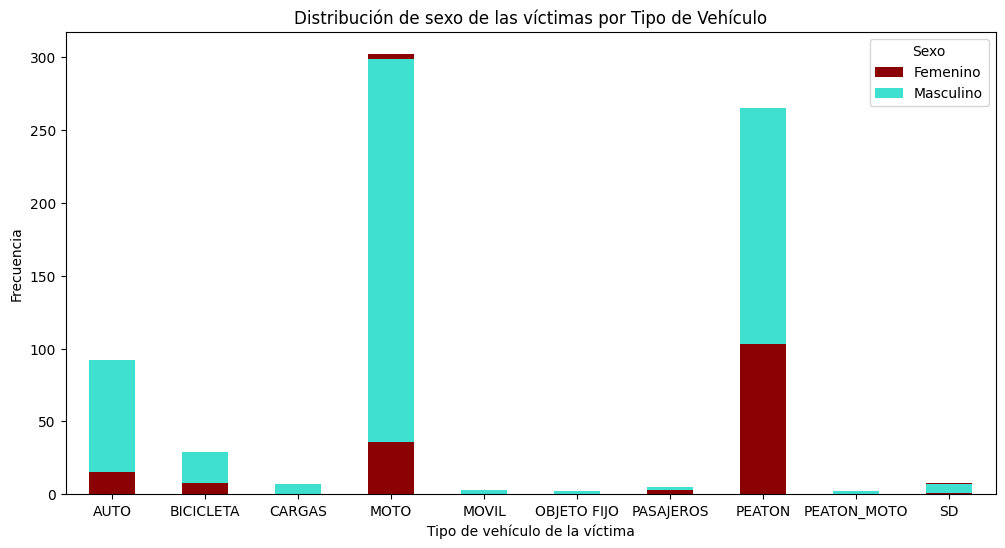

In [31]:
cross_tab = pd.crosstab(df['VICTIMA'], df['Sexo'])

ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), color=["darkred",'turquoise'])
plt.title('Distribución de sexo de las víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de vehículo de la víctima')
plt.ylabel('Frecuencia')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')
plt.xticks(rotation=0)
plt.show()

<u>***Interpretación***</u>

- La mayor cantidad víctimas fatales eran Varones y conducían una `Moto`.
- Los `Peatones`, son el segundo tipo de víctima en cantidad, y son más los varones que fallecieron que las mujeres, pero con poco margen de diferencia, menos del 20%.

Se debe generar normas que regulen el tránsito de las motos y sus correspondientes sanciones a los infractores ya que al no existirlas, sus conductores, en su mayoría, no miden las consecuencias.